## Transfer Learning Inception V3 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [23]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_dir = '/content/drive/MyDrive/deepLearningDataset/train'
val_dir = '/content/drive/MyDrive/deepLearningDataset/val'


In [14]:
import os
dir_path = '/content/drive/MyDrive/deepLearningDataset/'
for dirpath, dirnames, filenames in os.walk(dir_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/drive/MyDrive/deepLearningDataset/'.
There are 5 directories and 0 images in '/content/drive/MyDrive/deepLearningDataset/test'.
There are 0 directories and 5 images in '/content/drive/MyDrive/deepLearningDataset/test/fresh cotton plant'.
There are 0 directories and 5 images in '/content/drive/MyDrive/deepLearningDataset/test/fresh cotton leaf'.
There are 0 directories and 5 images in '/content/drive/MyDrive/deepLearningDataset/test/diseased cotton plant'.
There are 0 directories and 18 images in '/content/drive/MyDrive/deepLearningDataset/test/test data comp files'.
There are 0 directories and 3 images in '/content/drive/MyDrive/deepLearningDataset/test/diseased cotton leaf'.
There are 4 directories and 0 images in '/content/drive/MyDrive/deepLearningDataset/val'.
There are 0 directories and 88 images in '/content/drive/MyDrive/deepLearningDataset/val/fresh cotton plant'.
There are 0 directories and 80 images in '/content/drive/MyDrive/

In [82]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/deepLearningDataset/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Use the Image Data Generator to import the images from the dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224, 224) # define image size
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=32,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(val_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=32,
                                              class_mode="categorical")

Training images:
Found 1951 images belonging to 4 classes.
Testing images:
Found 324 images belonging to 4 classes.


In [36]:
train_data

In [38]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [33]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [43]:
History = model.fit_generator(
  train_data,
  validation_data=test_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data),
  callbacks=[create_tensorboard_callback("transfer_learning", "cotton_plant_disease")]
)

Saving TensorBoard log files to: transfer_learning/cotton_plant_disease/20240523-043147


<ipython-input-43-d6b57088445a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(


Epoch 1/5
61/61 [==============================] - 967s 16s/step - loss: 2.7661 - accuracy: 0.6725 - val_loss: 0.6473 - val_accuracy: 0.8117
Epoch 2/5
61/61 [==============================] - 41s 676ms/step - loss: 0.6859 - accuracy: 0.8508 - val_loss: 0.6541 - val_accuracy: 0.8673
Epoch 3/5
61/61 [==============================] - 40s 658ms/step - loss: 0.5113 - accuracy: 0.8821 - val_loss: 0.7355 - val_accuracy: 0.8519
Epoch 4/5
61/61 [==============================] - 40s 658ms/step - loss: 0.3547 - accuracy: 0.9077 - val_loss: 0.4219 - val_accuracy: 0.9012
Epoch 5/5
61/61 [==============================] - 41s 671ms/step - loss: 0.2971 - accuracy: 0.9236 - val_loss: 0.4337 - val_accuracy: 0.9105


In [46]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

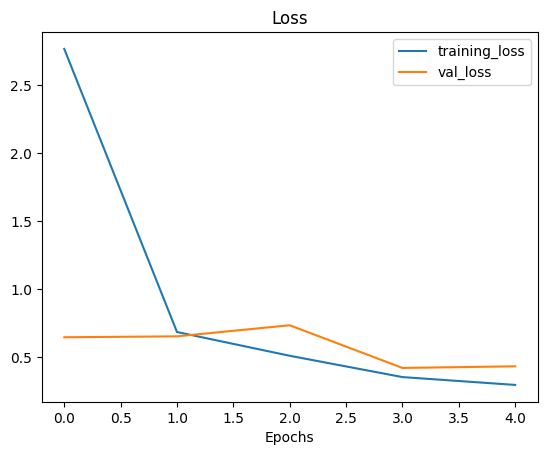

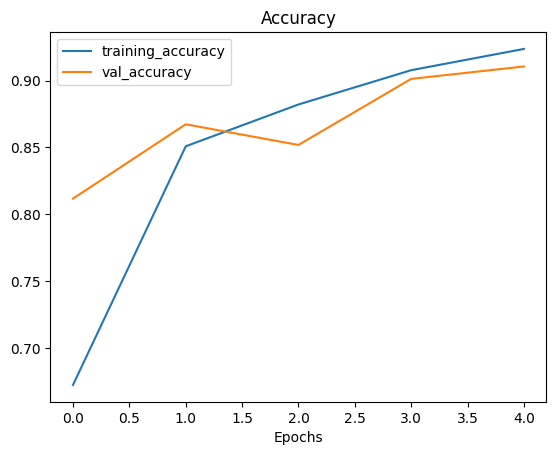

In [47]:
# Check out our model's training curves
plot_loss_curves(History)

In [41]:
images, labels = next(train_data)
print(images.shape, labels.shape)

(32, 224, 224, 3) (32, 4)


In [42]:
images,labels

(array([[[[0.6482078 , 0.5854626 , 0.44428614],
          [0.6269107 , 0.5641656 , 0.4229891 ],
          [0.6304134 , 0.5676683 , 0.42649186],
          ...,
          [0.48782727, 0.5467429 , 0.32753703],
          [0.5429719 , 0.60244536, 0.37746197],
          [0.41248277, 0.47078073, 0.23692465]],
 
         [[0.71122843, 0.64848334, 0.5073068 ],
          [0.69507986, 0.63233477, 0.49115828],
          [0.7017348 , 0.6389896 , 0.4978132 ],
          ...,
          [0.53751826, 0.5568127 , 0.33727542],
          [0.6050562 , 0.6281124 , 0.38434246],
          [0.56400853, 0.5845902 , 0.30933326]],
 
         [[0.79765797, 0.7349129 , 0.5937364 ],
          [0.8075925 , 0.7448474 , 0.60367095],
          [0.771978  , 0.7092329 , 0.56805646],
          ...,
          [0.6606339 , 0.6673512 , 0.35212275],
          [0.67442816, 0.68785614, 0.35028285],
          [0.7121492 , 0.7237971 , 0.37876323]],
 
         ...,
 
         [[0.61339146, 0.8625991 , 0.5566145 ],
          [0.66290

## fine tuning


In [49]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [83]:
print(len(model.trainable_variables))

In [63]:
# Make all the layers in model_2_base_model trainable
model.trainable = True

# Freeze all layers except for the last 10
for layer in model.layers[:-20]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [65]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [64]:
print(len(model.trainable_variables))

10


In [66]:
# Fine tune for another 5 epochs
fine_tune_epochs =10
history_fine_tune = model.fit(train_data,epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=History.epoch[-1], # start from previous last epoch
                                               validation_steps=len(test_data),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune")])

Saving TensorBoard log files to: transfer_learning/fine_tune/20240523-050559
Epoch 5/10
61/61 [==============================] - 52s 725ms/step - loss: 1.1852 - accuracy: 0.8678 - val_loss: 0.6225 - val_accuracy: 0.9259
Epoch 6/10
61/61 [==============================] - 43s 699ms/step - loss: 0.5830 - accuracy: 0.9323 - val_loss: 0.8955 - val_accuracy: 0.9043
Epoch 7/10
61/61 [==============================] - 46s 749ms/step - loss: 0.6781 - accuracy: 0.9308 - val_loss: 0.8004 - val_accuracy: 0.9383
Epoch 8/10
61/61 [==============================] - 42s 688ms/step - loss: 0.3885 - accuracy: 0.9487 - val_loss: 0.4472 - val_accuracy: 0.9630
Epoch 9/10
61/61 [==============================] - 42s 690ms/step - loss: 0.5116 - accuracy: 0.9523 - val_loss: 0.4911 - val_accuracy: 0.9414
Epoch 10/10
61/61 [==============================] - 41s 680ms/step - loss: 0.3358 - accuracy: 0.9605 - val_loss: 0.7399 - val_accuracy: 0.9444


In [67]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/model_inception.h5')

In [68]:
img=image.load_img('/content/drive/MyDrive/deepLearningDataset/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))



In [69]:
x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 137.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [70]:
x.shape

(224, 224, 3)

In [71]:
x=x/255.

In [72]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [81]:
# Get class indices from train_data
class_indices = train_data.class_indices

# Reverse the class_indices dictionary to map indices to labels
index_to_label = {v: k for k, v in class_indices.items()}

# Get the predicted class indices
a = np.argmax(model.predict(img_data), axis=1)

# Map the predicted class indices to class labels
predicted_labels = [index_to_label[i] for i in a]

# Print the predicted labels
print(predicted_labels)

1/1 [==============================] - 0s 27ms/step
['diseased cotton leaf']
